### Setup inicial

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print('OK')

OK


In [2]:
years = ['2009', '2019']

def create_paths_for_many_years(years, file_base_name):
    paths = dict()
    for year in years:
        paths[year] = '{}/dados/{}.CSV'.format(year, file_base_name)
    return paths
    
def read_datasets_for_many_years(years, paths):
    dfs = dict()
    for year in years:
        dfs[year] = pd.read_csv(filepath_or_buffer=paths[year], sep='|', engine='python', encoding=encoding)
    return dfs

teacher_paths = create_paths_for_many_years(years, 'SUP_DOCENTE')   

encoding='ISO-8859-1'

def get_federals(df):
    public  = df[df["TP_CATEGORIA_ADMINISTRATIVA"].isin([1])]
    return public

#ies_paths = _2019_path + 'SUP_IES_2019.CSV'
#curso_paths = _2019_path + 'SUP_CURSO_2019.CSV'
#aluno_paths = _2019_path + 'SUP_ALUNO_2019.CSV'


print(teacher_paths)

{'2009': '2009/dados/SUP_DOCENTE.CSV', '2019': '2019/dados/SUP_DOCENTE.CSV'}


### Preparação dos dados

In [3]:
teachers = read_datasets_for_many_years(years, teacher_paths)

In [4]:
columns = ['CO_CATEGORIA_ADMINISTRATIVA', 'CO_SITUACAO_DOCENTE', 'CO_ESCOLARIDADE_DOCENTE', 'IN_SEXO_DOCENTE', 'CO_COR_RACA_DOCENTE', 'IN_DOCENTE_DEFICIENCIA', 'IN_BOLSA_PESQUISA', 'IN_SUBSTITUTO']
teachers['2009'] = teachers['2009'][columns]

In [5]:
### 2009 adjusts
columns = {
    'CO_CATEGORIA_ADMINISTRATIVA': 'TP_CATEGORIA_ADMINISTRATIVA', 
    'CO_SITUACAO_DOCENTE': 'TP_SITUACAO',
    'CO_ESCOLARIDADE_DOCENTE': 'TP_ESCOLARIDADE',
    'IN_SEXO_DOCENTE': 'TP_SEXO',
    'CO_COR_RACA_DOCENTE': 'TP_COR_RACA',
    'IN_DOCENTE_DEFICIENCIA': 'IN_DEFICIENCIA'
}
teachers['2009'].rename(columns=columns, inplace=True)
teachers['2009']['NU_ANO_CENSO'] = pd.Series([2009 for x in range(len(teachers['2009'].index))])

teachers['2009']['TP_CATEGORIA_ADMINISTRATIVA'] = teachers['2009']['TP_CATEGORIA_ADMINISTRATIVA'].replace({1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada', 5: 'Privada', 6: 'Privada'})
teachers['2009']['TP_SEXO'] = teachers['2009']['TP_SEXO'].replace({0: 'Masculino', 1: 'Feminino'})

teachers['2009'].head()

,TP_CATEGORIA_ADMINISTRATIVA,TP_SITUACAO,TP_ESCOLARIDADE,TP_SEXO,TP_COR_RACA,IN_DEFICIENCIA,IN_BOLSA_PESQUISA,IN_SUBSTITUTO,NU_ANO_CENSO
0,Federal,1,3,Masculino,1,0,0.0,0.0,2009
1,Federal,1,5,Feminino,1,0,0.0,0.0,2009
2,Federal,1,4,Feminino,1,0,0.0,0.0,2009
3,Federal,1,4,Masculino,6,0,0.0,0.0,2009
4,Federal,1,4,Masculino,0,0,0.0,0.0,2009


In [6]:
### 2019 adjusts

columns = ['NU_ANO_CENSO', 'TP_CATEGORIA_ADMINISTRATIVA', 'TP_SITUACAO', 'TP_ESCOLARIDADE', 'TP_SEXO', 'TP_COR_RACA', 'IN_DEFICIENCIA', 'IN_BOLSA_PESQUISA', 'IN_SUBSTITUTO']
teachers['2019'] = teachers['2019'][columns]
teachers['2019']['TP_CATEGORIA_ADMINISTRATIVA'] = teachers['2019']['TP_CATEGORIA_ADMINISTRATIVA'].replace({1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada', 5: 'Privada', 6: 'Privada', 7: 'Especial', 8: 'Privada', 9: 'Privada'})
teachers['2019']['TP_SEXO'] = teachers['2019']['TP_SEXO'].replace({1: 'Feminino', 2: 'Masculino'})

In [7]:
### multiple adjusts

df = pd.concat([teachers['2009'], teachers['2019']])
df['TP_SITUACAO'] = df['TP_SITUACAO'].replace({1: 'Em exercício', 2: 'Afastado para qualificação', 3: 'Afastado por outros motivos', 4: 'Afastado por outros motivos', 5: 'Afastado por outros motivos', 6: 'Falecido'})
df['TP_ESCOLARIDADE'] = df['TP_ESCOLARIDADE'].replace({1: 'Sem graduação', 2: 'Graduação', 3: 'Especialização', 4: 'Mestrado', 5: 'Doutorado'})
df['TP_COR_RACA'] = df['TP_COR_RACA'].replace({0: 'Não quis declarar', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena', 6: 'Não dispõe da informação', 9: 'Não dispõe da informação'})
df['IN_DEFICIENCIA'] = df['IN_DEFICIENCIA'].replace({0: False, 1: True, 9: None})
df['IN_BOLSA_PESQUISA'] = df['IN_BOLSA_PESQUISA'].replace({0: False, 1: True})
df['IN_SUBSTITUTO'] = df['IN_SUBSTITUTO'].replace({0: False, 1: True})

df.rename(columns={'TP_CATEGORIA_ADMINISTRATIVA': 'Categoria Administrativa', 'TP_SITUACAO': 'Situação', 'TP_ESCOLARIDADE': 'Escolaridade', 'TP_SEXO': 'Sexo', 'TP_COR_RACA': 'Raça', 'NU_ANO_CENSO': 'Ano', 'IN_DEFICIENCIA': 'Deficiência', 'IN_BOLSA_PESQUISA': 'Bolsa Pesquisa', 'IN_SUBSTITUTO': 'Substituto'}, inplace=True)

df.head()

,Categoria Administrativa,Situação,Escolaridade,Sexo,Raça,Deficiência,Bolsa Pesquisa,Substituto,Ano
0,Federal,Em exercício,Especialização,Masculino,Branca,False,False,False,2009
1,Federal,Em exercício,Doutorado,Feminino,Branca,False,False,False,2009
2,Federal,Em exercício,Mestrado,Feminino,Branca,False,False,False,2009
3,Federal,Em exercício,Mestrado,Masculino,Não dispõe da informação,False,False,False,2009
4,Federal,Em exercício,Mestrado,Masculino,Não quis declarar,False,False,False,2009


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758517 entries, 0 to 399427
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Categoria Administrativa  758517 non-null  object
 1   Situação                  758517 non-null  object
 2   Escolaridade              758517 non-null  object
 3   Sexo                      758517 non-null  object
 4   Raça                      758517 non-null  object
 5   Deficiência               715141 non-null  object
 6   Bolsa Pesquisa            470661 non-null  object
 7   Substituto                734072 non-null  object
 8   Ano                       758517 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 57.9+ MB


In [9]:
df.isna().sum()

Categoria Administrativa         0
Situação                         0
Escolaridade                     0
Sexo                             0
Raça                             0
Deficiência                  43376
Bolsa Pesquisa              287856
Substituto                   24445
Ano                              0
dtype: int64

In [96]:
def get_total_by_year_by_reference(total_by_year, total_references, x):
    if len(total_references) <= 0:
        return total_by_year[x['Ano']]
    else:
        return total_by_year[tuple(x[col] for col in (['Ano']+total_references))]

def create_table_by_segregators(input_df, segregators, total_references = []):
    count_by_segregators_and_year = input_df.groupby(['Ano'] + segregators).size().reset_index(name='Quantidade')
    total_by_year = count_by_segregators_and_year.groupby(['Ano'] + total_references)['Quantidade'].sum()
    count_by_segregators_and_year['Porcentagem'] = count_by_segregators_and_year.apply(lambda x: (x['Quantidade'] / get_total_by_year_by_reference(total_by_year, total_references, x) * 100).round(2), axis=1)

    percentage_pivot = count_by_segregators_and_year.pivot(index=segregators, columns='Ano', values='Porcentagem')
    quantity_pivot  = count_by_segregators_and_year.pivot(index=segregators, columns='Ano', values='Quantidade')
    entities_by_segregators = pd.concat([quantity_pivot, percentage_pivot], axis=1)

    columns_tuples = [
        ('Quantidade', entities_by_segregators.columns[0]),
        ('Quantidade', entities_by_segregators.columns[1]),
        ('Porcentagem', entities_by_segregators.columns[2]),
        ('Porcentagem', entities_by_segregators.columns[3])
    ]
    columns = pd.MultiIndex.from_tuples(columns_tuples)
    entities_by_segregators.columns = columns

    quantity_evolution = entities_by_segregators['Quantidade', 2019] - entities_by_segregators['Quantidade', 2009]
    percentage_evolution = entities_by_segregators['Porcentagem', 2019] - entities_by_segregators['Porcentagem', 2009]
    
    percentage_increase = ((percentage_evolution/entities_by_segregators['Porcentagem', 2009]) * 100).round(2)

    entities_by_segregators[('Quantidade', 'Evolução')] = quantity_evolution
    entities_by_segregators[('Porcentagem', 'Evolução (%)')] = percentage_evolution
    entities_by_segregators[('Porcentagem', 'Aumento Percentual (%)')] = percentage_increase

    new_columns_order = [
        ('Quantidade', 2009),
        ('Quantidade', 2019),
        ('Quantidade', 'Evolução'),
        ('Porcentagem', 2009),
        ('Porcentagem', 2019),
        ('Porcentagem', 'Evolução (%)'),
        ('Porcentagem', 'Aumento Percentual (%)')
    ]

    entities_by_segregators = entities_by_segregators[new_columns_order]
    entities_by_segregators.index.name = segregators[0]

    reseted_entities_by_segregators = entities_by_segregators.reset_index()

    segregators_dict = dict()
    for segregator in segregators:
        segregators_dict[segregator] = reseted_entities_by_segregators[segregator]

    segregators_dict[2009] = reseted_entities_by_segregators[('Porcentagem', 2009)]
    segregators_dict[2019] = reseted_entities_by_segregators[('Porcentagem', 2019)]
    segregators_dict['Evolução (%)'] = reseted_entities_by_segregators[('Porcentagem', 'Evolução (%)')]
    segregators_dict['Aumento Percentual (%)'] = reseted_entities_by_segregators[('Porcentagem', 'Aumento Percentual (%)')]

    entities_evolution_by_segregators = pd.DataFrame(segregators_dict)

    return entities_by_segregators, entities_evolution_by_segregators, count_by_segregators_and_year

def plot_slope_graph(x, y, hue, data, ax, **kwargs):
    graph = sns.lineplot(x=x, y=y, hue=hue, marker='o', linewidth=2, data=data, ax=ax, **kwargs)
    graph.set_xticks([2009, 2019])
    #ax.set_title("Relação entre total da conta e gorjeta")

    for line, name in zip(graph.lines, data[hue].unique()):
        if len(line.get_ydata()):
            y_initial = line.get_ydata()[0]
            y_final = line.get_ydata()[-1]

            # Adicionar valor inicial
            graph.annotate(f'{y_initial:.2f}%',
                           xy=(0, y_initial),
                           xytext=(-40, 0),
                           color=line.get_color(),
                           xycoords=graph.get_yaxis_transform(),
                           textcoords="offset points",
                           size=12,
                           va="center")

            # Adicionar valor final
            graph.annotate(f'{y_final:.2f}%     {name}',
                           xy=(1, y_final),
                           xytext=(6, 0),
                           color=line.get_color(),
                           xycoords=graph.get_yaxis_transform(),
                           textcoords="offset points",
                           size=12,
                           va="center")   


    ax.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    graph.legend_ = None
      


def plot_comparison_graph(count_by_segregator_and_year_df, segregator, spacing = 0.5, label_rotation = 0, horizontalalignment = 'center', **kwargs):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    plt.subplots_adjust(wspace=spacing, hspace=spacing)
    
    graphs = []

    graphs.append(sns.barplot(x=segregator, y="Quantidade", hue="Ano", data=count_by_segregator_and_year_df, ax=axs[0, 0], **kwargs))
    graphs.append(sns.barplot(x=segregator, y="Porcentagem", hue="Ano", data=count_by_segregator_and_year_df, ax=axs[0,1], **kwargs))

    graphs.append(sns.lineplot(x="Ano", y="Quantidade", hue=segregator, marker='o', data=count_by_segregator_and_year_df, ax=axs[1,0]))
    graphs.append(sns.lineplot(x="Ano", y="Porcentagem", hue=segregator, marker='o', data=count_by_segregator_and_year_df, ax=axs[1,1]))

    for graph in graphs[2:4]:
        graph.set_xticks([2009, 2019])

    for graph in graphs:
        graph.set_xticklabels(graph.get_xticklabels(), rotation=label_rotation, horizontalalignment=horizontalalignment)
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    return count_by_segregator_and_year_df

def plot_evolution_graph(entities_evolution_by_segregator, segregator, spacing = 0.5, label_rotation = 0, horizontalalignment = 'center'):
    fig, axs = plt.subplots()

    graph = sns.barplot(x=segregator, y='Aumento Percentual (%)', data=entities_evolution_by_segregator)
    
    graph.set_xticklabels(graph.get_xticklabels(), rotation=label_rotation, horizontalalignment=horizontalalignment)

    plt.tight_layout()


## Qual a presença de docentes por raça?

In [11]:
race_input_df = df[(df['Situação'] == 'Em exercício') & (df['Raça'] != 'Não dispõe da informação') & (df['Raça'] != 'Não quis declarar')]
teachers_by_race, teachers_evolution_by_race, count_by_race_and_year = create_table_by_segregators(race_input_df, ['Raça'])

novo_df = race_input_df.groupby('Ano').size().reset_index(name='Quantidade').set_index('Ano').reset_index()
novo_df

,Ano,Quantidade
0,2009,206197
1,2019,272985


In [12]:
teachers_by_race

Quantidade                  Porcentagem                      \
               2009    2019 Evolução        2009   2019 Evolução (%)   
Raça                                                                   
Amarela        2607    3941     1334        1.26   1.44         0.18   
Branca       166797  204072    37275       80.89  74.76        -6.13   
Indígena        443     494       51        0.21   0.18        -0.03   
Parda         32293   56662    24369       15.66  20.76         5.10   
Preta          4057    7816     3759        1.97   2.86         0.89   

                                 
         Aumento Percentual (%)  
Raça                             
Amarela                   14.29  
Branca                    -7.58  
Indígena                 -14.29  
Parda                     32.57  
Preta                     45.18

In [13]:
teachers_evolution_by_race

,Raça,2009,2019,Evolução (%),Aumento Percentual (%)
0,Amarela,1.26,1.44,0.18,14.29
1,Branca,80.89,74.76,-6.13,-7.58
2,Indígena,0.21,0.18,-0.03,-14.29
3,Parda,15.66,20.76,5.10,32.57
4,Preta,1.97,2.86,0.89,45.18


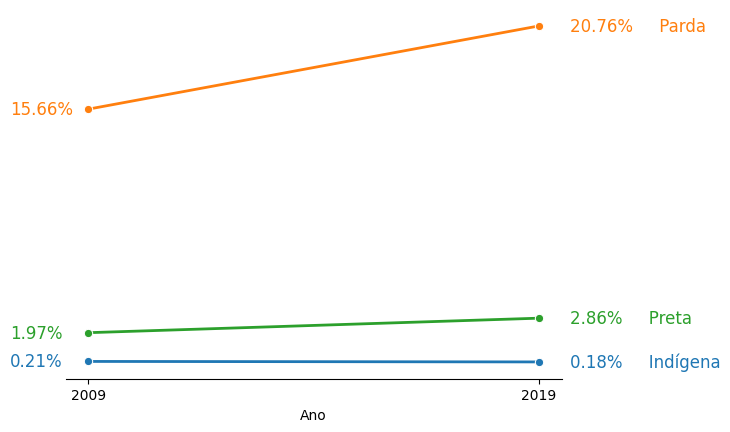

In [14]:
#palette = {'Preta': 'black', 'Parda': 'black', 'Indígena': 'black'}    
desired_races_df = count_by_race_and_year[count_by_race_and_year['Raça'].isin(['Preta', 'Parda', 'Indígena'])]
plot_slope_graph(x='Ano', hue="Raça", y="Porcentagem", data=desired_races_df)

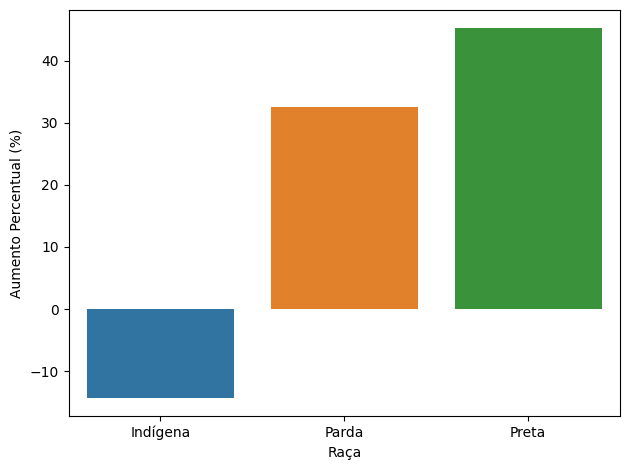

In [15]:
plot_evolution_graph(teachers_evolution_by_race[teachers_evolution_by_race['Raça'].isin(['Preta', 'Parda', 'Indígena'])], 'Raça')  

## Qual a presença de docentes por escolaridade?

In [16]:
scolarship_input_df = df[(df['Situação'] == 'Em exercício') & (df['Escolaridade'] != 'Sem graduação')]
teachers_by_scolarship, teachers_evolution_by_scolarship, count_by_scolarship_and_year = create_table_by_segregators(scolarship_input_df, ['Escolaridade'])

In [17]:
teachers_by_scolarship

Quantidade                  Porcentagem                      \
                     2009    2019 Evolução        2009   2019 Evolução (%)   
Escolaridade                                                                 
Doutorado           89850  177017    87167       26.38  45.85        19.47   
Especialização      99406   60690   -38716       29.18  15.72       -13.46   
Graduação           27921    3479   -24442        8.20   0.90        -7.30   
Mestrado           123466  144874    21408       36.24  37.53         1.29   

                                       
               Aumento Percentual (%)  
Escolaridade                           
Doutorado                       73.81  
Especialização                 -46.13  
Graduação                      -89.02  
Mestrado                         3.56

In [18]:
teachers_evolution_by_scolarship

,Escolaridade,2009,2019,Evolução (%),Aumento Percentual (%)
0,Doutorado,26.38,45.85,19.47,73.81
1,Especialização,29.18,15.72,-13.46,-46.13
2,Graduação,8.20,0.90,-7.30,-89.02
3,Mestrado,36.24,37.53,1.29,3.56


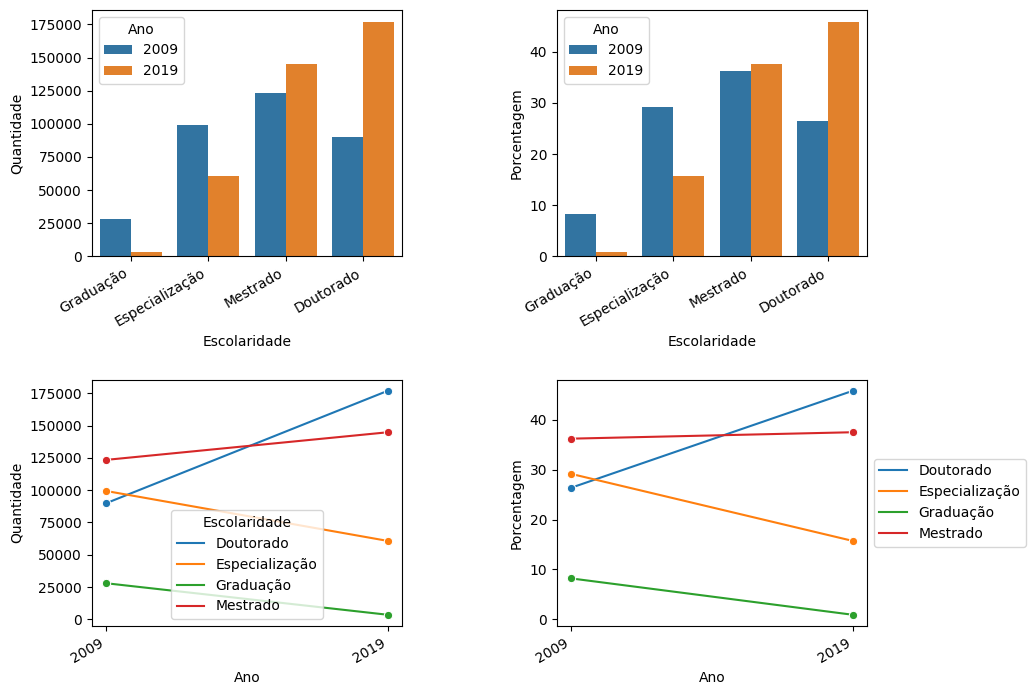

,Ano,Escolaridade,Quantidade,Porcentagem
0,2009,Doutorado,89850,26.38
1,2009,Especialização,99406,29.18
2,2009,Graduação,27921,8.20
3,2009,Mestrado,123466,36.24
4,2019,Doutorado,177017,45.85
5,2019,Especialização,60690,15.72
6,2019,Graduação,3479,0.90
7,2019,Mestrado,144874,37.53


In [19]:
order = ["Graduação", "Especialização", "Mestrado", "Doutorado"]
plot_comparison_graph(count_by_scolarship_and_year, 'Escolaridade', label_rotation=30, horizontalalignment='right', order=order)

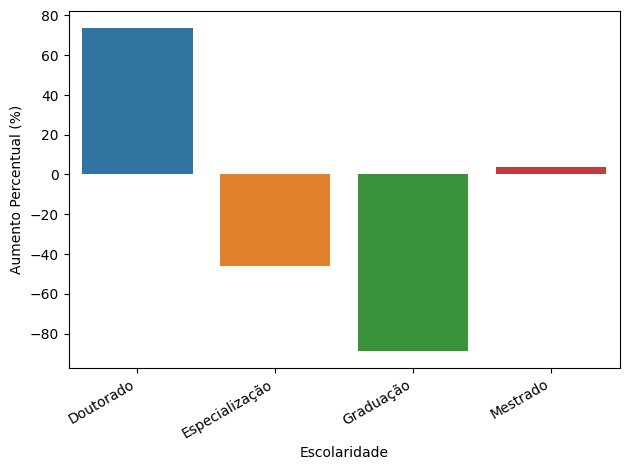

In [20]:
plot_evolution_graph(teachers_evolution_by_scolarship, 'Escolaridade', label_rotation = 30, horizontalalignment='right')

In [21]:
race_input_df = df[(df['Situação'] == 'Em exercício') & (df['Raça'] != 'Não dispõe da informação') & (df['Raça'] != 'Não quis declarar') & (df['Escolaridade'] != 'Sem graduação')]
teachers_by_race_and_scolarship, teachers_evolution_by_race_and_scolarship, count_by_race_and_scolarship_and_year = create_table_by_segregators(race_input_df, ['Raça', 'Escolaridade'], ['Raça'])
teachers_by_race_and_scolarship

Quantidade                 Porcentagem         \
                              2009   2019 Evolução        2009   2019   
Raça     Escolaridade                                                   
Amarela  Doutorado             981   2050     1069       37.64  52.02   
         Especialização        608    555      -53       23.33  14.08   
         Graduação             135     51      -84        5.18   1.29   
         Mestrado              882   1285      403       33.84  32.61   
Branca   Doutorado           42929  91389    48460       25.75  44.78   
         Especialização      49488  32523   -16965       29.69  15.94   
         Graduação            9975   1145    -8830        5.98   0.56   
         Mestrado            64309  79011    14702       38.58  38.72   
Indígena Doutorado              85    258      173       19.19  52.23   
         Especialização        128     53      -75       28.89  10.73   
         Graduação              43      3      -40        9.71   0.61   
         Mestrado              187    180       -7       42.21  36.44   
Parda    Doutorado            4316  19551    15235       13.37  34.51   
         Especialização      13480  11509    -1971       41.76  20.31   
         Graduação            2254    684    -1570        6.98   1.21   
         Mestrado            12226  24915    12689       37.88  43.97   
Preta    Doutorado             740   3088     2348       18.24  39.51   
         Especialização       1385   1372      -13       34.15  17.56   
         Graduação             337    112     -225        8.31   1.43   
         Mestrado             1594   3243     1649       39.30  41.50   

                                                             
                        Evolução (%) Aumento Percentual (%)  
Raça     Escolaridade                                        
Amarela  Doutorado             14.38                  38.20  
         Especialização        -9.25                 -39.65  
         Graduação             -3.89                 -75.10  
         Mestrado              -1.23                  -3.63  
Branca   Doutorado             19.03                  73.90  
         Especialização       -13.75                 -46.31  
         Graduação             -5.42                 -90.64  
         Mestrado               0.14                   0.36  
Indígena Doutorado             33.04                 172.17  
         Especialização       -18.16                 -62.86  
         Graduação             -9.10                 -93.72  
         Mestrado              -5.77                 -13.67  
Parda    Doutorado             21.14                 158.12  
         Especialização       -21.45                 -51.36  
         Graduação             -5.77                 -82.66  
         Mestrado               6.09                  16.08  
Preta    Doutorado             21.27                 116.61  
         Especialização       -16.59                 -48.58  
         Graduação             -6.88                 -82.79  
         Mestrado               2.20                   5.60

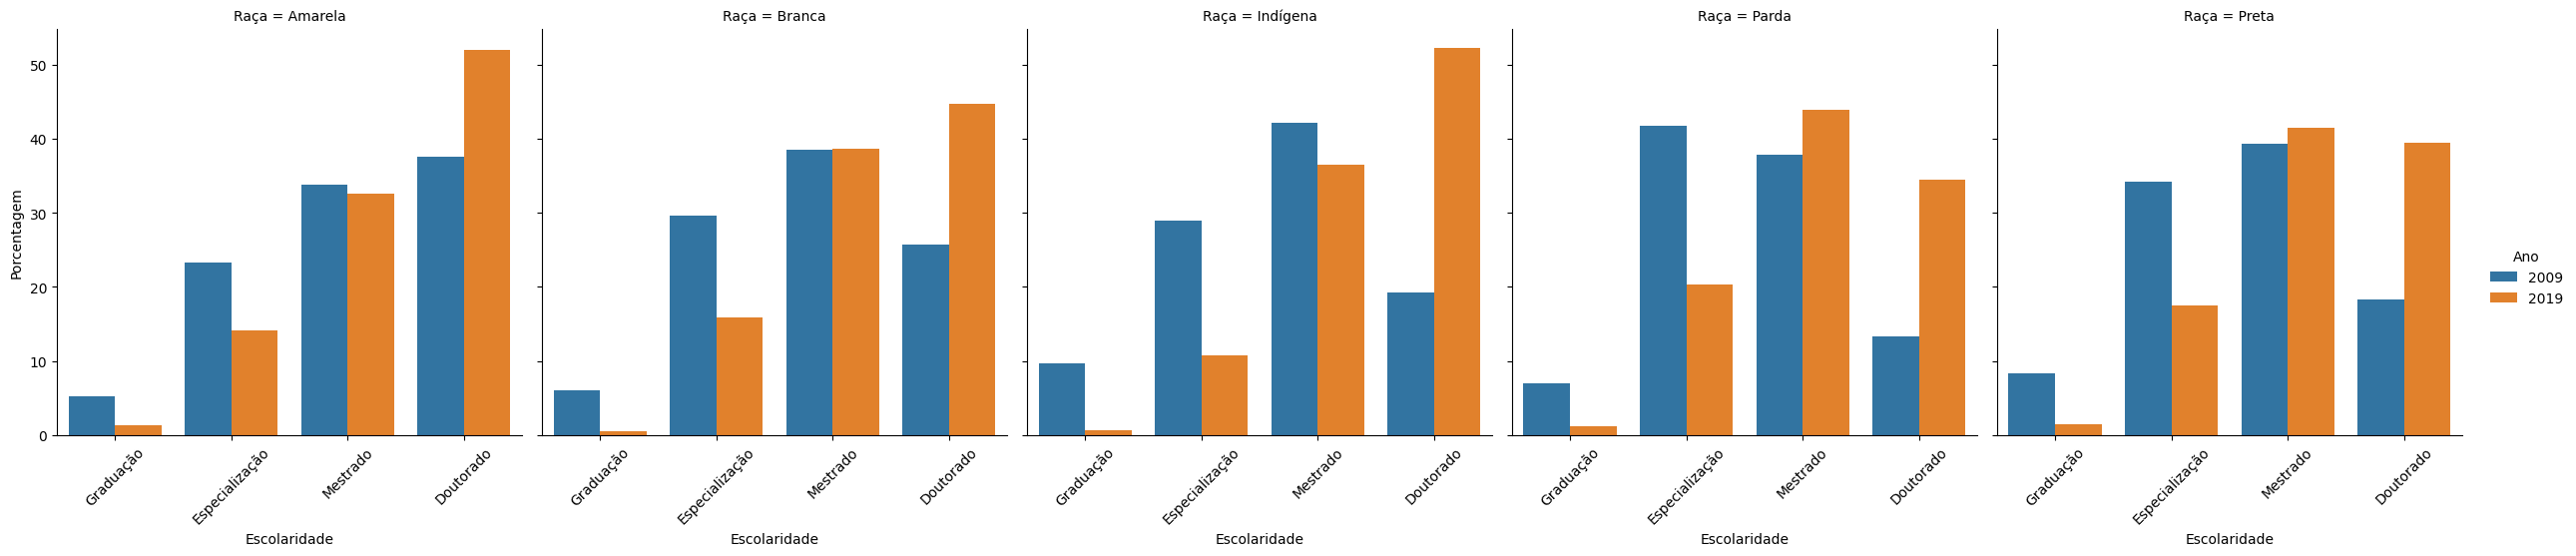

In [22]:
# tem que corrigir para mostrar o percentual apenas dentro dessa categoria de doutorado

order = ["Graduação", "Especialização", "Mestrado", "Doutorado"]

graph = sns.catplot(
    data=count_by_race_and_scolarship_and_year,
    x='Escolaridade',
    y='Porcentagem',
    hue='Ano',
    col='Raça',
    kind='bar',
    order=order
)

graph.set_xticklabels(rotation=45)



se der tempo vou fazer uma barra horizontal empilhada de 2009 e uma de 2019

- Entre os de raça amarela a predominância em ambos os anos está pendendendo para doutorado, a tendência foi de crescer na carreira
- Entre os de raça Branca a predominância estava centralizada em mestrado, com mais gente na especialização que no doutorado. Isso se inverteu e agora a predominância está em doutorado.
- Entre os indígenas é igual na branca.
- Na parda a predominância era especialização caindo até o doutorado. 

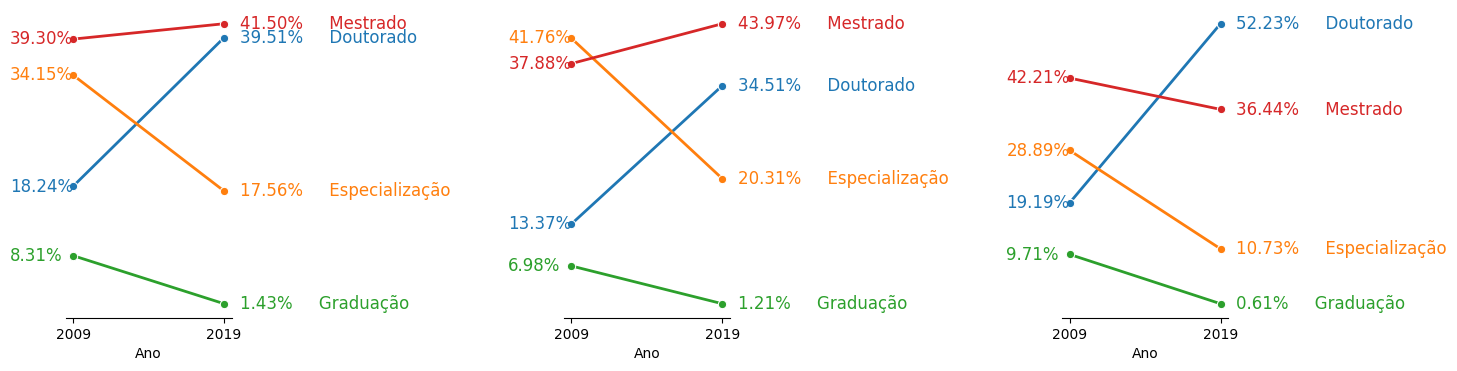

In [94]:
races = ['Preta', 'Parda', 'Indígena']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
plt.subplots_adjust(wspace=2)

for i, race in enumerate(races):
    desired_races_df = count_by_race_and_scolarship_and_year[count_by_race_and_scolarship_and_year['Raça'] == race]
    plot_slope_graph(x='Ano', y='Porcentagem', hue='Escolaridade', data=desired_races_df, ax=axes[i])

## Qual a presença de docentes por categoria administrativa?

In [24]:
administrative_category_input_df = df[(df['Situação'] == 'Em exercício') & (df['Categoria Administrativa'] != 'Especial')]
teachers_by_administrative_category, teachers_evolution_by_administrative_category, count_by_administrative_category_and_year = create_table_by_segregators(administrative_category_input_df, ['Categoria Administrativa'])

In [25]:
count_by_administrative_category_and_year

,Ano,Categoria Administrativa,Quantidade,Porcentagem
0,2009,Estadual,43145,12.66
1,2009,Federal,72228,21.19
2,2009,Municipal,7604,2.23
3,2009,Privada,217840,63.92
4,2019,Estadual,49437,12.86
5,2019,Federal,120497,31.35
6,2019,Municipal,4702,1.22
7,2019,Privada,209670,54.56


In [26]:
teachers_by_administrative_category

Quantidade                  Porcentagem         \
                               2009    2019 Evolução        2009   2019   
Categoria Administrativa                                                  
Estadual                      43145   49437     6292       12.66  12.86   
Federal                       72228  120497    48269       21.19  31.35   
Municipal                      7604    4702    -2902        2.23   1.22   
Privada                      217840  209670    -8170       63.92  54.56   

                                                              
                         Evolução (%) Aumento Percentual (%)  
Categoria Administrativa                                      
Estadual                         0.20                   1.58  
Federal                         10.16                  47.95  
Municipal                       -1.01                 -45.29  
Privada                         -9.36                 -14.64

In [27]:
teachers_evolution_by_administrative_category

,Categoria Administrativa,2009,2019,Evolução (%),Aumento Percentual (%)
0,Estadual,12.66,12.86,0.20,1.58
1,Federal,21.19,31.35,10.16,47.95
2,Municipal,2.23,1.22,-1.01,-45.29
3,Privada,63.92,54.56,-9.36,-14.64


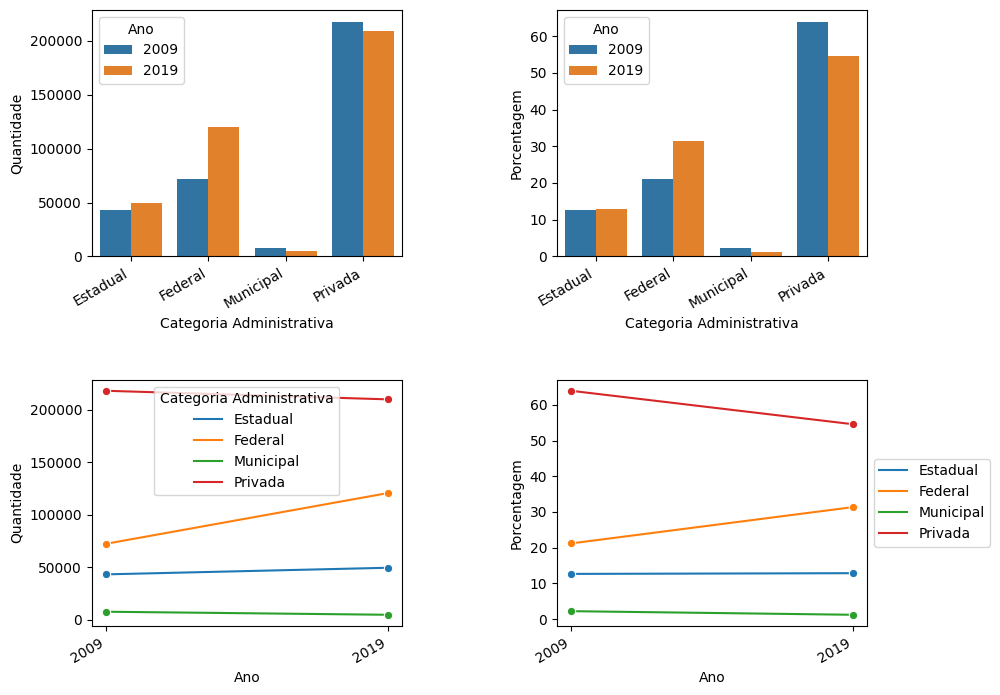

,Ano,Categoria Administrativa,Quantidade,Porcentagem
0,2009,Estadual,43145,12.66
1,2009,Federal,72228,21.19
2,2009,Municipal,7604,2.23
3,2009,Privada,217840,63.92
4,2019,Estadual,49437,12.86
5,2019,Federal,120497,31.35
6,2019,Municipal,4702,1.22
7,2019,Privada,209670,54.56


In [28]:
plot_comparison_graph(count_by_administrative_category_and_year, 'Categoria Administrativa', label_rotation=30, horizontalalignment='right')

## Qual a presença de docentes com bolsa de pesquisa?

In [29]:
research_grant_df = df[(df['Situação'] == 'Em exercício')]
teachers_by_research_grant, teachers_evolution_by_research_grant, count_by_research_grant_and_year = create_table_by_segregators(research_grant_df, ['Bolsa Pesquisa'])

In [30]:
teachers_by_research_grant

Quantidade                  Porcentagem                      \
                     2009    2019 Evolução        2009   2019 Evolução (%)   
Bolsa Pesquisa                                                               
False              329399  104635  -224764       96.65  85.29       -11.36   
True                11405   18040     6635        3.35  14.71        11.36   

                                       
               Aumento Percentual (%)  
Bolsa Pesquisa                         
False                          -11.75  
True                           339.10

In [31]:
teachers_evolution_by_research_grant

,Bolsa Pesquisa,2009,2019,Evolução (%),Aumento Percentual (%)
0,False,96.65,85.29,-11.36,-11.75
1,True,3.35,14.71,11.36,339.10


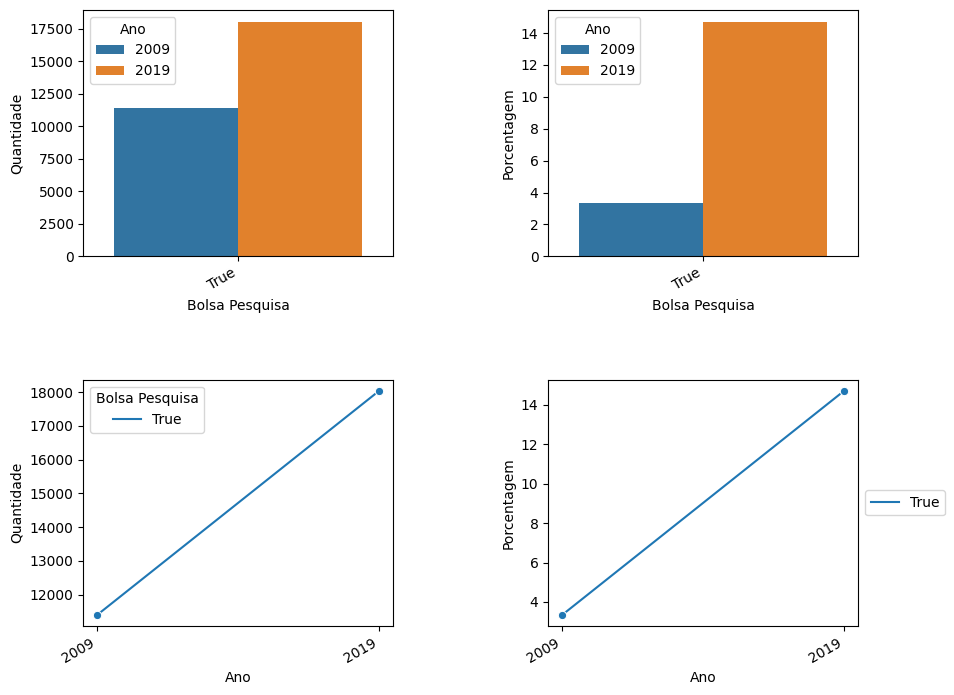

,Ano,Bolsa Pesquisa,Quantidade,Porcentagem
1,2009,True,11405,3.35
3,2019,True,18040,14.71


In [32]:
plot_comparison_graph(count_by_research_grant_and_year[(count_by_research_grant_and_year['Bolsa Pesquisa'] == True)], 'Bolsa Pesquisa', label_rotation=30, horizontalalignment='right')

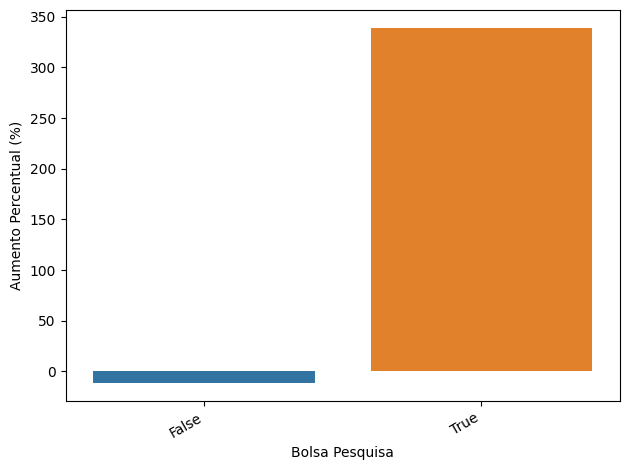

In [33]:
plot_evolution_graph(teachers_evolution_by_research_grant, 'Bolsa Pesquisa', label_rotation = 30, horizontalalignment='right')

## Qual a presença de docentes deficientes?

In [34]:
deficiency_df = df[(df['Situação'] == 'Em exercício')]
teachers_by_deficiency, teachers_evolution_by_deficiency, count_by_deficiency_and_year = create_table_by_segregators(research_grant_df, ['Deficiência'])

In [35]:
count_by_deficiency_and_year

,Ano,Deficiência,Quantidade,Porcentagem
0,2009,False,339859,99.72
1,2009,True,958,0.28
2,2019,False,342705,99.52
3,2019,True,1667,0.48


In [36]:
teachers_by_deficiency

Quantidade                  Porcentagem                      \
                  2009    2019 Evolução        2009   2019 Evolução (%)   
Deficiência                                                               
False           339859  342705     2846       99.72  99.52         -0.2   
True               958    1667      709        0.28   0.48          0.2   

                                    
            Aumento Percentual (%)  
Deficiência                         
False                        -0.20  
True                         71.43

In [37]:
teachers_evolution_by_deficiency

,Deficiência,2009,2019,Evolução (%),Aumento Percentual (%)
0,False,99.72,99.52,-0.2,-0.20
1,True,0.28,0.48,0.2,71.43


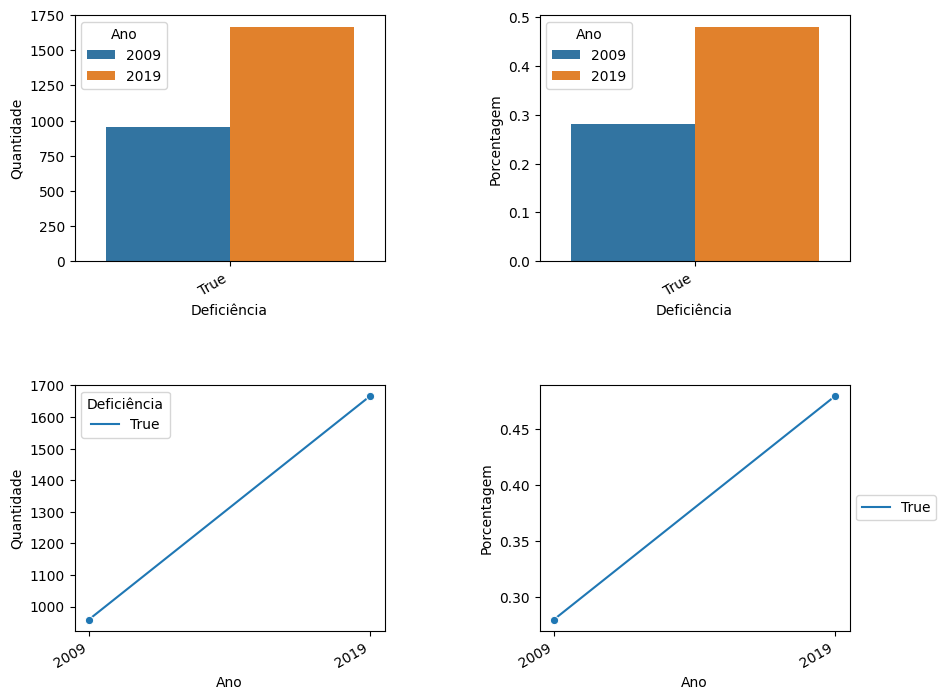

,Ano,Deficiência,Quantidade,Porcentagem
1,2009,True,958,0.28
3,2019,True,1667,0.48


In [38]:
plot_comparison_graph(count_by_deficiency_and_year[(count_by_deficiency_and_year['Deficiência'] == True)], 'Deficiência', label_rotation=30, horizontalalignment='right')

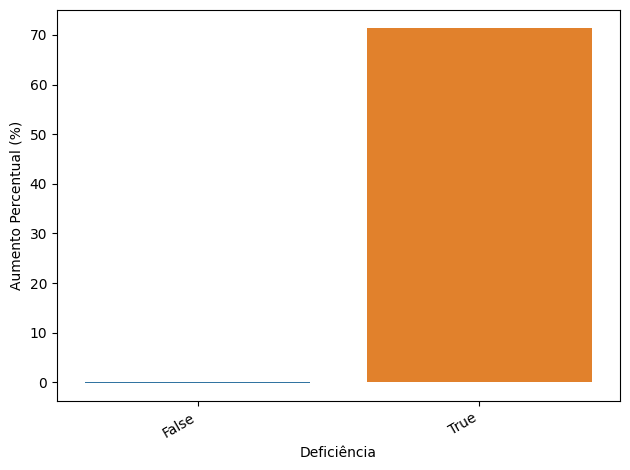

In [39]:
plot_evolution_graph(teachers_evolution_by_deficiency, 'Deficiência', label_rotation = 30, horizontalalignment='right')

### Estratificação por raça

In [40]:
g = sns.catplot(
    data=count_by_race_and_year,
    x='Raça',
    y='Porcentagem',
    hue='Ano',
    col='Escolaridade',
    kind='bar'
)


KeyError: 'Escolaridade'

In [ ]:
g = sns.relplot(
    data=count_by_race_and_year,
    x="Ano",
    y="Quantidade",
    col="Raça",
    hue="Escolaridade",
    kind="line"
)